# Language Model Evaluation - MercadoLibre Challenge (Español)

In [1]:
import os
import re
import json

import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

import analysis_utils as aut

In [2]:
#%matplotlib notebook #Interact with graphs
%config InlineBackend.figure_formats = ['svg']
pd.options.display.max_columns = 50
sns.set(style="whitegrid")
matplotlib.rcParams['figure.figsize'] = [8, 8]

RESULTS_DIR = ["../experiments/NNLM_128-v1/",
               "../experiments/NNLM_50-v1/"]

In [3]:
results = aut.load_result_directories(RESULTS_DIR)
df = aut.load_full_dataset(results)
must_be_unique = ['dataset', 'GPU', 'output_dim', 'max_seq_len', 
                  'training_set_size', 'test_set_size']
#df['lm'] = df['lm'].str.extract(r'nnlm-es-(.*)-w.*').astype('category')
aut.warn_if_experiments_differ(df, must_be_unique)

['Tesla T4' 'Tesla P100-PCIE-16GB']
[1571 1573 1572 1574]


In [4]:
names = {
    'nnlm-en-dim128':'en128', 
    'nnlm-en-dim128-with-normalization':'en128n',
    'nnlm-en-dim50':'en50', 
    'nnlm-en-dim50-with-normalization':'en50n',
    'nnlm-es-dim128':'es128', 
    'nnlm-es-dim128-with-normalization':'es128n',
    'nnlm-es-dim50':'es50', 
    'nnlm-es-dim50-with-normalization':'es50n'
}
df['lang'] = df.lm.str.extract(r'nnlm-(..)-dim.*')
df['lm_name'] = df.lm.map(names)
df.sort_values(['runid'])

,runid,version,GPU,dataset,rows_to_load,training_set_size,test_set_size,max_seq_len,output_dim,lm,batch_size,learning_rate,training_time,bac,min_loss,last_loss,total_epochs,best_epoch,val_loss,test_bac,lang,lm_name
2,lmevME-LM-NNLM_128-v1-200304_1815,NNLM_128-v1,Tesla T4,../data/es-train.csv,All,1000000,25000,Full,1573,nnlm-en-dim128,4096,0.001,229.908895,0.713068,1.093800,1.099509,10,8,"[1.7719115739440918, 1.33194394947052, 1.21078...","[0.4927084743976593, 0.6245380640029907, 0.664...",en,en128
12,lmevME-LM-NNLM_128-v1-200304_1819,NNLM_128-v1,Tesla T4,../data/es-train.csv,All,1000000,25000,Full,1571,nnlm-en-dim128,4096,0.001,230.849489,0.713891,1.125380,1.133144,10,9,"[1.7892080438995361, 1.3542228689575195, 1.229...","[0.4952629506587982, 0.6379880905151367, 0.676...",en,en128
0,lmevME-LM-NNLM_128-v1-200304_1824,NNLM_128-v1,Tesla T4,../data/es-train.csv,All,1000000,25000,Full,1571,nnlm-en-dim128-with-normalization,4096,0.001,232.116772,0.736752,1.063922,1.075590,10,7,"[1.6947038507843017, 1.2717089140701294, 1.159...","[0.5183268785476685, 0.6543141007423401, 0.695...",en,en128n
4,lmevME-LM-NNLM_128-v1-200304_1828,NNLM_128-v1,Tesla T4,../data/es-train.csv,All,1000000,25000,Full,1573,nnlm-en-dim128-with-normalization,4096,0.001,233.646404,0.732691,1.044312,1.050907,10,7,"[1.6940438722991944, 1.2595248734283446, 1.141...","[0.5220264196395874, 0.6481383442878723, 0.689...",en,en128n
13,lmevME-LM-NNLM_128-v1-200304_1833,NNLM_128-v1,Tesla T4,../data/es-train.csv,All,1000000,25000,Full,1571,nnlm-es-dim128,4096,0.001,208.514853,0.738935,1.000956,1.019008,9,6,"[1.5188867874908447, 1.1464146963882447, 1.057...","[0.5494391322135925, 0.6718970537185669, 0.701...",es,es128
15,lmevME-LM-NNLM_128-v1-200304_1837,NNLM_128-v1,Tesla T4,../data/es-train.csv,All,1000000,25000,Full,1572,nnlm-es-dim128,4096,0.001,214.993458,0.733315,0.992100,1.013855,9,6,"[1.5086137328338622, 1.148984751701355, 1.0554...","[0.5496474504470825, 0.668241024017334, 0.7033...",es,es128
7,lmevME-LM-NNLM_128-v1-200304_1841,NNLM_128-v1,Tesla T4,../data/es-train.csv,All,1000000,25000,Full,1572,nnlm-es-dim128-with-normalization,4096,0.001,191.782086,0.743561,0.934081,0.949232,8,5,"[1.4328247576522828, 1.0689225365829467, 0.980...","[0.5562136769294739, 0.6811506748199463, 0.718...",es,es128n
6,lmevME-LM-NNLM_128-v1-200304_1845,NNLM_128-v1,Tesla T4,../data/es-train.csv,All,1000000,25000,Full,1572,nnlm-es-dim128-with-normalization,4096,0.001,213.100372,0.761384,0.948657,0.984875,9,6,"[1.4539074226760864, 1.0878812634277344, 0.996...","[0.5667646527290344, 0.6986390352249146, 0.730...",es,es128n
8,lmevME-LM-NNLM_128-v1-200304_2054,NNLM_128-v1,Tesla P100-PCIE-16GB,../data/es-train.csv,All,1000000,25000,Full,1574,nnlm-en-dim128,4096,0.001,143.906892,0.722501,1.119058,1.122219,10,9,"[1.7739028198242188, 1.3467352375793458, 1.225...","[0.498893141746521, 0.639047384262085, 0.67355...",en,en128
14,lmevME-LM-NNLM_128-v1-200304_2057,NNLM_128-v1,Tesla P100-PCIE-16GB,../data/es-train.csv,All,1000000,25000,Full,1573,nnlm-en-dim128,4096,0.001,145.480483,0.719690,1.122377,1.126550,10,9,"[1.8007071538162231, 1.3683913053894043, 1.240...","[0.5060247778892517, 0.6314957141876221, 0.671...",en,en128


## Summary

### Number of Trials

In [5]:
len(df)

32

### Tested Language Models

In [6]:
sorted(list(df.lm.unique()))

['nnlm-en-dim128',
 'nnlm-en-dim128-with-normalization',
 'nnlm-en-dim50',
 'nnlm-en-dim50-with-normalization',
 'nnlm-es-dim128',
 'nnlm-es-dim128-with-normalization',
 'nnlm-es-dim50',
 'nnlm-es-dim50-with-normalization']

### Epochs trained (include EarlyStopping)

In [7]:
sorted(list(df.total_epochs.unique()))

[8, 9, 10]

## Balanced Accuracy (BAC)

### BAC Summary

In [8]:
df.bac.describe()

count    32.000000
mean      0.731212
std       0.016012
min       0.700802
25%       0.720873
50%       0.732797
75%       0.741989
max       0.761384
Name: bac, dtype: float64

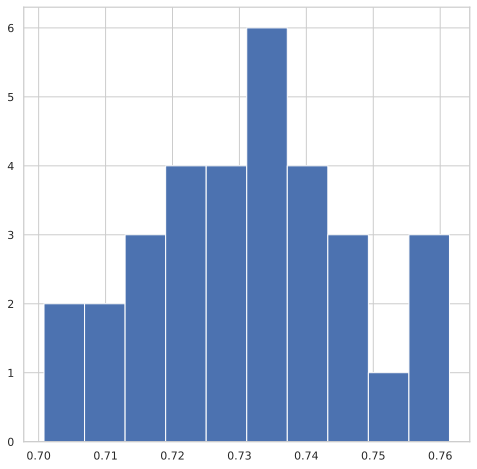

In [9]:
df.bac.hist()

### BAC by Experiment

#### BAC by Experiment, sorted by Langauge Model

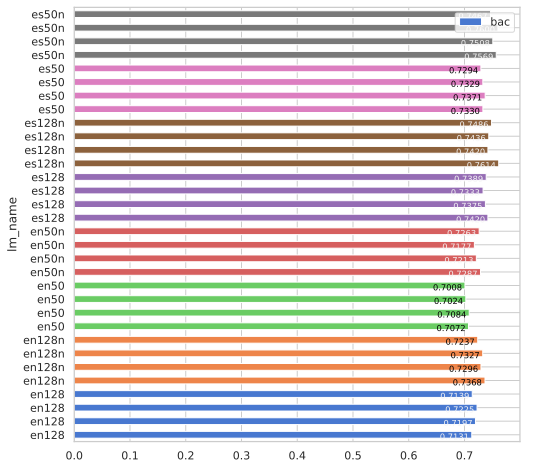

In [10]:
df1 = df.sort_values('lm', ascending=True)
ax = df1.plot.barh(x='lm_name', y='bac', color=aut.colors_by_value(df1['lm']))
aut.annotate_barh(ax)

#### BAC by Training Language

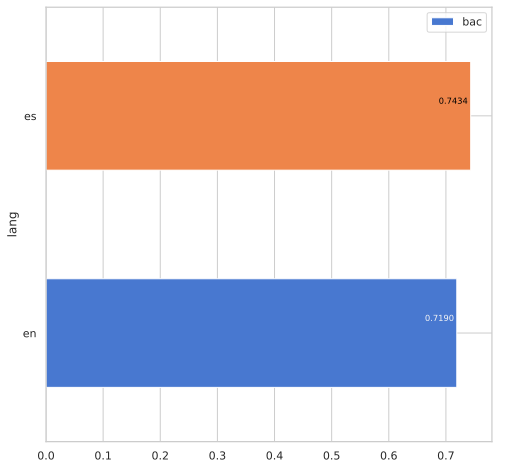

In [11]:
df1 = df.groupby('lang').mean().reset_index()
df1 = df1.sort_values('bac', ascending=True)
colors, handles = aut.colors_by_value(df1['lang'], return_legend_handles=True)
ax = df1.plot.barh(x='lang', y='bac', color = colors)
aut.annotate_barh(ax)

#### BAC by Experiment, sorted by BAC

Color shows LM language version

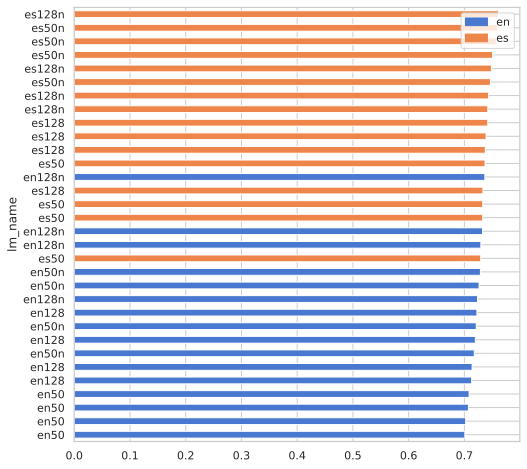

In [12]:
df1 = df.sort_values('bac', ascending=True)
colors, handles = aut.colors_by_value(df1['lang'], return_legend_handles=True)
ax = df1.plot.barh(x='lm_name', y='bac', color=colors)
ax.legend(handles=handles)

### BAC by LM

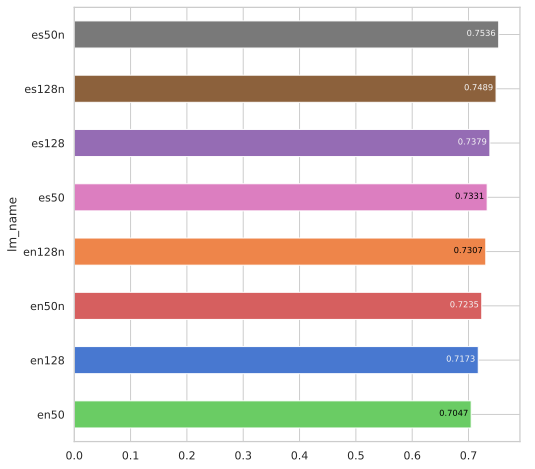

In [13]:
df1 = df.groupby('lm_name').mean().sort_values('bac')
ax = df1.plot.barh(y='bac', color=aut.colors_by_value(df1.index), legend=False)
aut.annotate_barh(ax)

### BAC vs minimum loss, grouped by LM

In [14]:
df1 = df.groupby('lm_name').mean().reset_index()
df1

,lm_name,training_set_size,test_set_size,output_dim,batch_size,learning_rate,training_time,bac,min_loss,last_loss,total_epochs,best_epoch
0,en128,1000000.0,25000.0,1572.75,4096.0,0.001,187.536440,0.717287,1.115154,1.120355,10.0,8.75
1,en128n,1000000.0,25000.0,1572.25,4096.0,0.001,193.066878,0.730678,1.049303,1.059699,10.0,7.00
2,en50,1000000.0,25000.0,1572.25,4096.0,0.001,121.569712,0.704701,1.170959,1.170959,10.0,10.00
3,en50n,1000000.0,25000.0,1572.00,4096.0,0.001,126.151828,0.723518,1.088033,1.088033,10.0,10.00
4,es128,1000000.0,25000.0,1571.75,4096.0,0.001,174.431934,0.737934,1.006614,1.025809,9.0,6.00
5,es128n,1000000.0,25000.0,1572.25,4096.0,0.001,168.457157,0.748879,0.946441,0.970576,8.5,5.50
6,es50,1000000.0,25000.0,1572.00,4096.0,0.001,120.374167,0.733097,1.041689,1.044324,10.0,9.25
7,es50n,1000000.0,25000.0,1571.75,4096.0,0.001,131.009479,0.753600,0.982662,0.990890,10.0,8.50


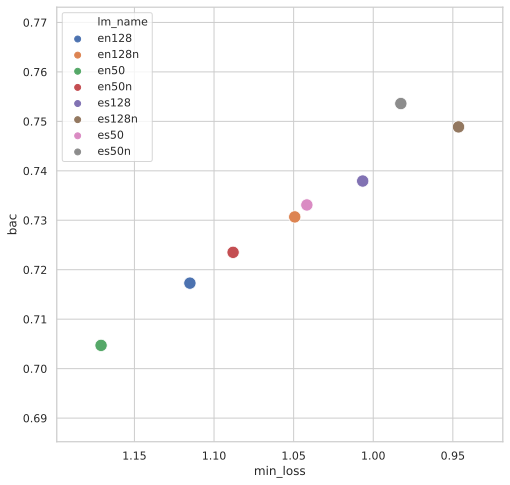

In [15]:
ax = sns.scatterplot(
    data=df1,
    x='min_loss',
    y='bac',
    hue='lm_name',
    s=150,
    alpha=1
).invert_xaxis()

### BAC vs minimum loss, all trials

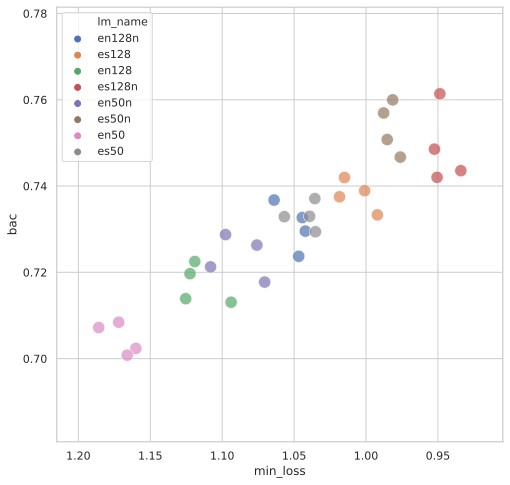

In [16]:
ax = sns.scatterplot(
    data = df, 
    x = 'min_loss', 
    y = 'bac', 
    hue = 'lm_name',
    s = 150, 
    alpha = 0.7).invert_xaxis()

## Training Time

### BAC by Training Time, grouped by LM and GPU

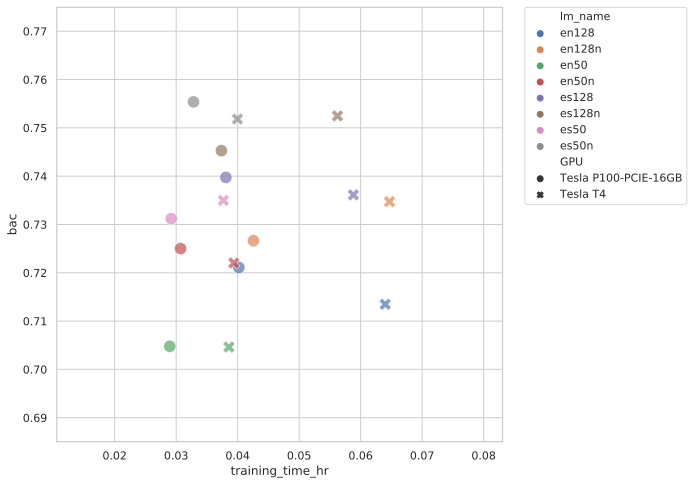

In [17]:
df1 = df
df1['training_time_hr'] = df1['training_time'] / 3600
df1 = df1.groupby(['lm_name', 'GPU']).mean().reset_index()

ax = sns.scatterplot(
    data = df1, 
    y = 'bac', 
    x = 'training_time_hr', 
    hue = 'lm_name',
    style = 'GPU',
    s = 150, 
    alpha = 0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### BAC vs Training time and GPU, all trials

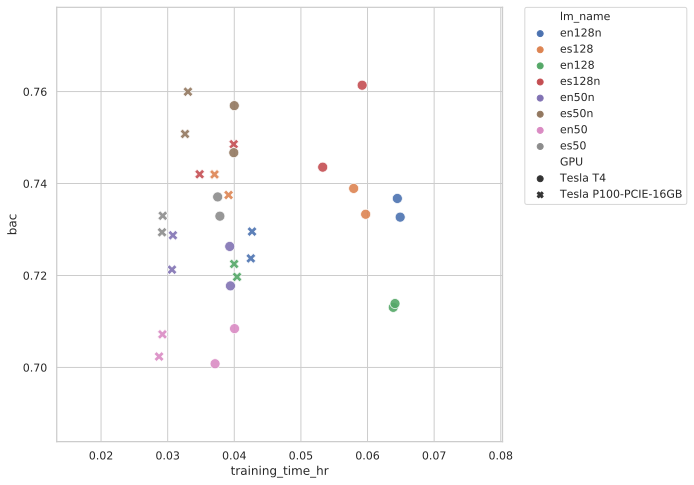

In [18]:
ax = sns.scatterplot(
    data=df,
    x='training_time_hr',
    y='bac', 
    hue='lm_name',
    style='GPU',
    s=100, alpha=0.9
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Learning Curves

### BAC Learning Curves, averaged by LM

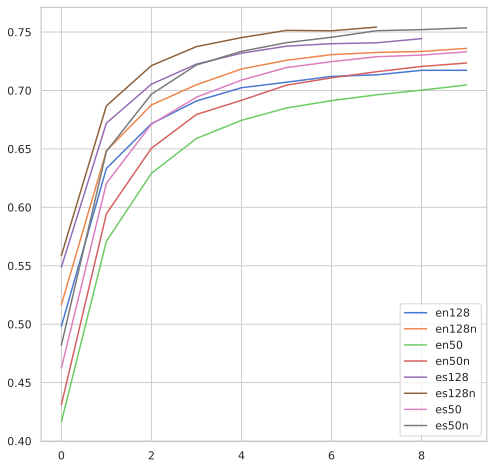

In [19]:
aggregated = aut.average_list_metric(df, 'test_bac', 'lm_name', ignore_trailing=True)
aut.plot_learning_curve(aggregated, 'test_bac', 'lm_name')

### val_loss Learning Curves, averaged by LM

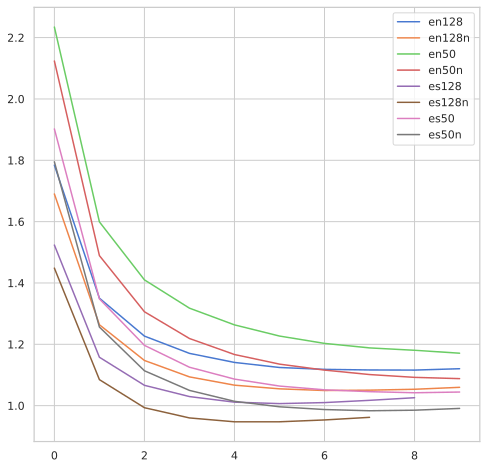

In [20]:
aggregated = aut.average_list_metric(df, 'val_loss', 'lm_name', ignore_trailing=True)
aut.plot_learning_curve(aggregated, 'val_loss', 'lm_name')